# 21. MNIST Data

- 손글씨 숫자 데이터
  - 미국 우체국의 우편번호 자동 인식을 위한 Data set
  - http://yann.lecun.com/exdb/mnist

![](./images/21/mnist.jpg)

## 28X28X1 image

![](./images/21/four_data.jpg)

- placeholder 정의

```python
nb_classes = 9
X = tf.placeholder(tf.float32, [None, 784]) 
## 0-9 숫자: 10개 클래스
Y = tf.placeholder(tf.float32, [None, nb_classes])
```

- 24X24 = 784

## MNIST Dataset

- 데이터 적재 코드
  - 상세 정보
    - https://www.tensorflow.org/get_started/mnist/beginners

```python
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('MINIST_data/', one_hot=True)
# 디렉터리 생성
# download
# one_hot속성에 따라서 y값 변경
...
batch_xs, batch_ys = mnist.train.next_batch(100)
...
print("Accuracy:", 
    accuracy.eval(session=sess, feed_dict={X:mnist.test.images, Y:mnist.test.labels}))
```

----

In [29]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [30]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [31]:
nb_classes = 10

In [32]:
!ls MNIST_data/


t10k-images-idx3-ubyte.gz  train-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte.gz  train-labels-idx1-ubyte.gz


In [33]:
# data image of shape: 28X28=784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digit
Y = tf.placeholder(tf.float32, [None, nb_classes])

In [34]:
W = tf.Variable(tf.random_normal([784, nb_classes]), name="weight")
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

## Softmax

In [35]:
hypothesis = tf.nn.softmax(tf.matmul(X, W)+b)
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [36]:
# test model
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
#정밀도 계산
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

## Training epoch/batch

Epoch: 0001 cost= 3.057395240
Epoch: 0002 cost= 1.164992256
Epoch: 0003 cost= 0.915713020
Epoch: 0004 cost= 0.792909303
Epoch: 0005 cost= 0.715176899
Epoch: 0006 cost= 0.662062239
Epoch: 0007 cost= 0.621187018
Epoch: 0008 cost= 0.589503884
Epoch: 0009 cost= 0.561948294
Epoch: 0010 cost= 0.539469285
Epoch: 0011 cost= 0.521770131
Epoch: 0012 cost= 0.505022181
Epoch: 0013 cost= 0.490586032
Epoch: 0014 cost= 0.477465812
Epoch: 0015 cost= 0.466000684
Epoch: 0016 cost= 0.456648666
Epoch: 0017 cost= 0.447906436
Epoch: 0018 cost= 0.439063811
Epoch: 0019 cost= 0.431005344
Epoch: 0020 cost= 0.424117434
Epoch: 0021 cost= 0.417316261
Epoch: 0022 cost= 0.411112031
Epoch: 0023 cost= 0.405683159
Epoch: 0024 cost= 0.400474100
Epoch: 0025 cost= 0.394924234
Epoch: 0026 cost= 0.390352839
Epoch: 0027 cost= 0.386832722
Epoch: 0028 cost= 0.381140450
Epoch: 0029 cost= 0.377755667
Epoch: 0030 cost= 0.374386517
Epoch: 0031 cost= 0.370744788
Epoch: 0032 cost= 0.367183784
Epoch: 0033 cost= 0.363841630
Epoch: 003

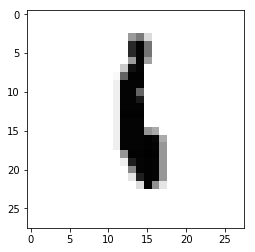

In [53]:
training_eposh = 50
batch_size = 100

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_eposh):
        avg_cost = 0
        totoal_batch = int(mnist.train.num_examples/batch_size)
        
        for i in range(totoal_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict = {X:batch_xs, Y:batch_ys})
            avg_cost += c/totoal_batch
            
        print("Epoch:", '%04d' % (epoch+1), 'cost=','{:.9f}'.format(avg_cost))
    

    print("Accuracy:", accuracy.eval(session=sess, feed_dict=
                                    {X:mnist.test.images, 
                                     Y:mnist.test.labels}))
    
    r = random.randint(0, mnist.test.num_examples-1)
    print("Label:", sess.run(tf.arg_max(mnist.test.labels[r:r+1],1)))
    print("Prediction:", sess.run(tf.argmax(hypothesis, 1),
                                  feed_dict={X:mnist.test.images[r:r+1] }))
    plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys',
            interpolation='nearest')
    plt.show()

       

## Training epoch/batch

- epoch
  - 전체 데이터 셋을 학습한 것
- batch size
  - 한번의 forward/backward에 학습된 학습 데이터의 수
- iterations
  - batch size가 처리된 수

- example
  - 전체 데이터가 1000개이고
  - batch size가 500이라면
  -  1 epoch을 위히서는 몇번의 iteration이 필요한가? 
    - 2번

In [54]:
import datetime
print(datetime.datetime.now())

2017-06-07 14:14:20.873322
